# 1. Perkenalan

#### 1.1 Gambaran Data
Data merupakan Image seekor anjing jenis Rhodesian Ridgeback

#### 1.2 Sumber Data
Dataset asli berasal dari: https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg 

#### 1.3 Objective yang ingin dicapai
Objective yang ingin dicapai adalah mendeteksi edge suatu gambar dan melakukan transformasi linear pada gambar 

# 2. Import Pustaka

In [1]:
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 3. Loading Image

In [2]:
image = Image.open('dog.jpeg')

#### 3.1 Menampilkan gambar

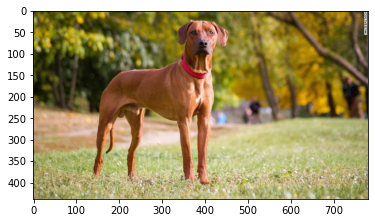

In [3]:
plt.imshow(image);

In [4]:
print(image.size)

(780, 438)


ukuran image adalah panjang 700 dan lebar 438

In [5]:
print(image.format)

JPEG


image memiliki file format JPEG

In [6]:
print(image.mode)

RGB


mode warna dasar image adalah RGB

#### 3.2 Melakukan Transformasi linear Image

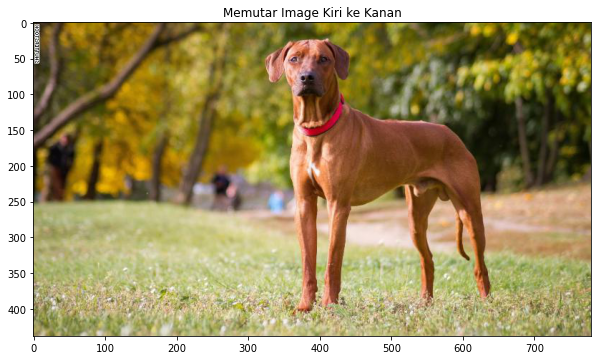

In [7]:
# "Memutar Image Kiri ke Kanan"
transpose_image_right = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.figure(figsize=(10,10))
plt.title("Memutar Image Kiri ke Kanan")
plt.imshow(transpose_image_right);

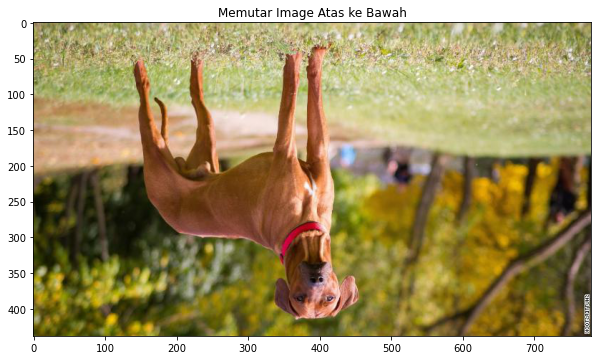

In [8]:
# "Memutar Image Atas ke Bawah"
transpose_image_top = image.transpose(Image.FLIP_TOP_BOTTOM)
plt.figure(figsize=(10,10))
plt.title("Memutar Image Atas ke Bawah")
plt.imshow(transpose_image_top);

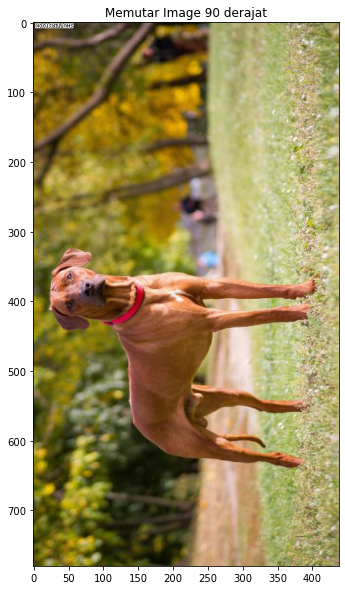

In [9]:
# "Memutar Image 90 derajat"
transpose_image_ninty = image.transpose(Image.ROTATE_90)
plt.figure(figsize=(10,10))
plt.title("Memutar Image 90 derajat")
plt.imshow(transpose_image_ninty);

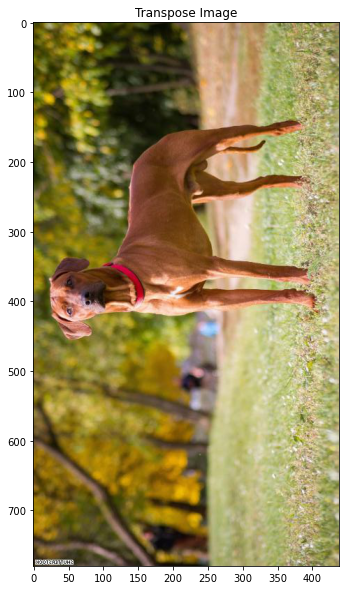

In [10]:
# melakukan transpose Image
transpose_image = image.transpose(Image.TRANSPOSE)
plt.figure(figsize=(10,10))
plt.title("Transpose Image")
plt.imshow(transpose_image);

#### 3.3 Melakukan Pemotongan (Cropping) Image

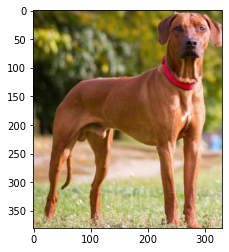

In [11]:
image_crop = image.crop(box = (120,20,450,400))
plt.imshow(image_crop);

memotong image dengan keterangan:

1. membuat size image menjadi panjang 450 dan lebar 400
2. memotong size pada sisi atas image sebesar 20
3. memotong image pada sisi kiri sebesar 120

# 4. Data Preprocessing

#### 4.1 Memisahkan warna dasar RGB ( Red, Green, Blue)

In [12]:
red, green, blue = image.split()

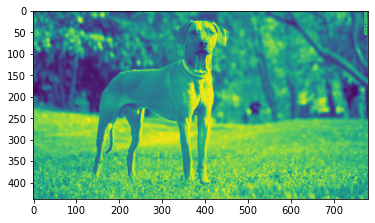

In [13]:
plt.imshow(red);

Menampilkan image dengan warna dasar Red

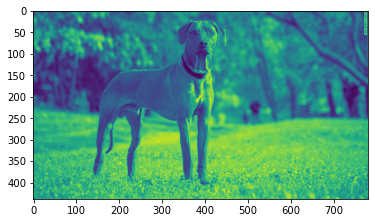

In [14]:
plt.imshow(green);

Menampilkan image dengan warna dasar Green

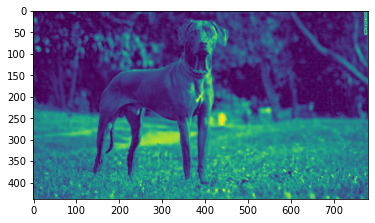

In [15]:
plt.imshow(blue);

Menampilkan image dengan warna dasar Blue

#### 4.2 Mengubah warna dasar RGB (Red, Green, Blue) kedalam bentuk array

In [16]:
red = np.array(red) 
green = np.array(green) 
blue = np.array(blue) 
image = np.array(image)

#### 4.3 Merubah warna RGB (Red, Green, Blue) menjadi grayscale

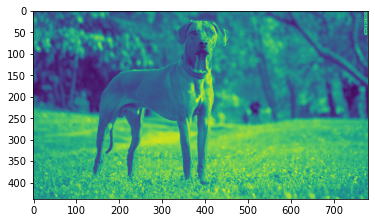

In [17]:
grayscale = 0.299*red+0.587*green+0.114*blue
plt.imshow(grayscale);

Melakukan proses transformasi dengan mengubah RGB dasar Image menjadi Grayscale

#### 4.4 Melakukan Filtering Komponen Warna 

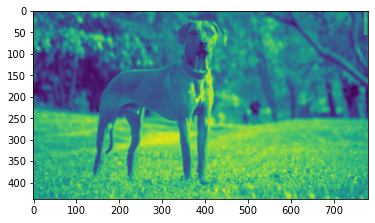

In [18]:
image_gaussian = ndimage.gaussian_filter(grayscale, sigma=1)
plt.imshow(image_gaussian);

Melakukan proses filtering komponen warna untuk menghilangkan noise pada gambar dengan menggunakan library scipy Gaussian Filter

# 5. Image Processing

#### keterangan

* Gx = x gradient (horizontal changes)
* Gy = y gradient (vertical changes)

$
Gx = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}
$

$
Gy = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}
$

#### 5.1 Membuat Matrix Gradient X

In [19]:
Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Gx

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

#### 5.2 Menghitung turunan partial Ix

In [20]:
Ix = ndimage.filters.convolve(image_gaussian, Gx)
# Menamplkan Ix
Ix

array([[ 1.50061129e+00,  5.87480219e+00,  1.09689903e+01, ...,
         5.61732141e-01, -1.46379371e-01, -1.13892247e+00],
       [ 7.27776528e-01,  2.93847031e+00,  5.56805203e+00, ...,
         3.63953360e+01,  3.93404123e+01,  1.33459395e+01],
       [-1.19952547e-01, -4.83287022e-01, -1.00032703e+00, ...,
         1.23066345e+02,  1.35268063e+02,  4.93223102e+01],
       ...,
       [ 1.75314141e+01,  4.45722511e+01,  4.87068575e+01, ...,
         2.74647718e+00,  1.23300132e+01,  7.67588384e+00],
       [ 2.00003371e+01,  4.91832689e+01,  5.02148029e+01, ...,
         6.90580670e+00,  1.49790526e+01,  8.79707126e+00],
       [ 2.09017701e+01,  5.07047940e+01,  5.03233587e+01, ...,
         9.69988387e+00,  1.78379695e+01,  1.01232158e+01]])

**Ix** merupakan perhitungan turunan partial dari **image_gaussian** yang merupakan pixel ke **Gx**

#### 5.3 Membuat Matrix Gradient Y

In [21]:
Gy = np.array([ [1,2,1], [0,0,0], [-1,-2,-1] ])
# Menampilkan Matrix Gy
Gy

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

#### 5.4 Menghitung turunan partial Iy

In [22]:
Iy = ndimage.filters.convolve(image_gaussian, Gy)
# Menampilkan Iy
Iy

array([[-24.30922425, -23.12684967, -20.48643147, ...,  30.86282108,
         18.21329983,   8.11451938],
       [-56.61051729, -54.08372523, -48.38687329, ..., 153.30131107,
         90.63043677,  46.75756362],
       [-54.52093694, -52.77824259, -48.48495814, ..., 296.98067395,
        177.05288889,  89.02174081],
       ...,
       [ -4.35480866,  -9.54024595, -14.41768355, ...,   6.16228792,
          3.29655558,   2.29013794],
       [ -5.0470218 ,  -6.94152525,  -8.18305083, ...,  20.41367703,
         16.47104041,  13.70723121],
       [ -1.72945109,  -2.25790584,  -2.64646118, ...,  10.59927552,
          8.88891806,   7.46766583]])

**Iy** merupakan perhitungan turunan partial dari **image_gaussian** yang merupakan pixel ke **Gy**

#### 5.5 Menghitung Gradient Magnitude

In [23]:
grad = np.sqrt(Ix**2 + Iy**2)
grad

array([[ 24.35549666,  23.86135948,  23.23817167, ...,  30.86793268,
         18.21388805,   8.19405694],
       [ 56.61519519,  54.16349271,  48.7061876 , ..., 157.56240814,
         98.80052686,  48.62493039],
       [ 54.5210689 ,  52.78045526,  48.49527626, ..., 321.46982122,
        222.81197065, 101.77210141],
       ...,
       [ 18.06418667,  45.58181504,  50.79594046, ...,   6.74662355,
         12.76309144,   8.01023873],
       [ 20.62730989,  49.67070274,  50.87719288, ...,  21.55013633,
         22.26358437,  16.28731562],
       [ 20.97319709,  50.7550419 ,  50.3928982 , ...,  14.36775517,
         19.93002809,  12.57956799]])

Melakukan Proses Gradient Magnitude untuk nilai Ix dan Iy

#### 5.6 Menampilkan Edge Detection

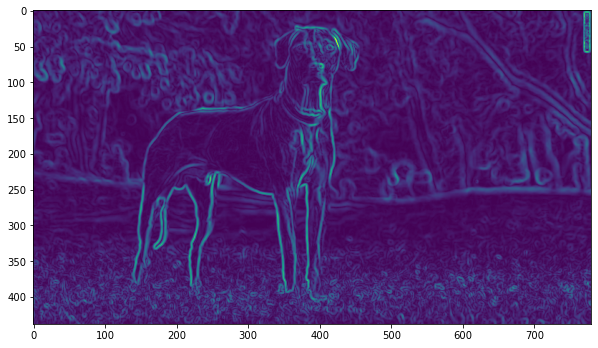

In [24]:
transform =  grad * 30
plt.figure(figsize=(10,10))
plt.imshow(transform);

Melakukan proses penampilan Edge detection gambar dengan Threshold = 30

#### 5.8 Membuat function edge_detection dengan paramater Image dan juga nilai Threshold

In [25]:
def edge_detection(img, thres):
        Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        Gy = np.array([ [1,2,1], [0,0,0], [-1,-2,-1] ])
        
        Ix = ndimage.filters.convolve(img, Gx)
        Iy = ndimage.filters.convolve(img, Gy)
        
        grad = np.sqrt(Ix**2 + Iy**2)
        treshold = thres
        
        transform = grad * treshold
        
        return transform

# 6 Hasil dan Kesimpulan

#### 6.1 Hasil dan Kesimpulan Dengan Threshold -30

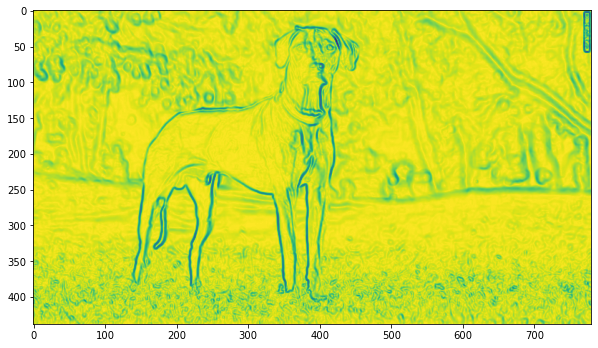

In [26]:
image_sobel = edge_detection(image_gaussian, -30)
plt.figure(figsize=(10,10))
plt.imshow(image_sobel);

Diatas merupakan tampilan gambar dengan Threshold -30

#### 6.2 Hasil dan Kesimpulan Dengan Threshold 0

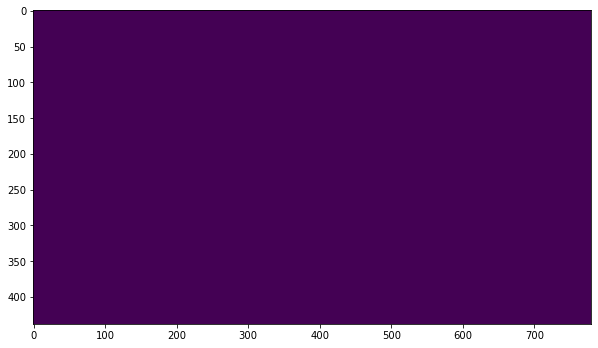

In [27]:
image_sobel = edge_detection(image_gaussian, 0)
plt.figure(figsize=(10,10))
plt.imshow(image_sobel);

Diatas merupakan tampilan gambar dengan nilai Threshold 0

#### 6.3 Hasil dan Kesimpulan Dengan Threshold 30

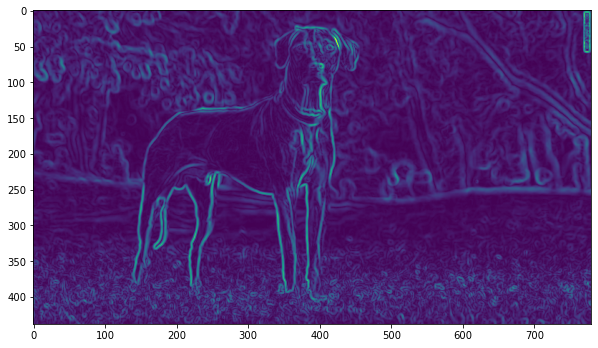

In [28]:
image_sobel = edge_detection(image_gaussian, 30)
plt.figure(figsize=(10,10))
plt.imshow(image_sobel);

Diatas merupakan tampilan gambar dengan nilai Threshold 30